a) Vizualizati in pgmpy graful retelei Markov, apoi determinati clicile modelului

b) Determinati probabilitatea comuna a celor 5 variabile si deduceti starile de probabilitate maxima pentru acestea

In [ ]:
!pip install pgmpy

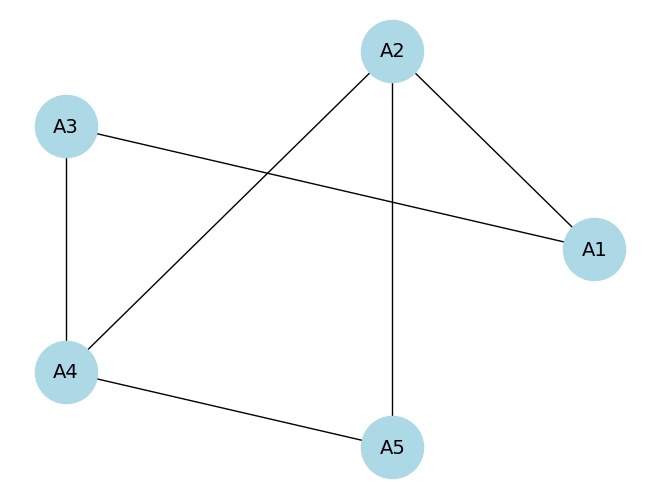


Clicile modelului sunt: [['A3', 'A4'], ['A3', 'A1'], ['A2', 'A4', 'A5'], ['A2', 'A1']]

Probabilitate comuna pt toate variabilele:
+-------+-------+-------+-------+-------+-----------------------+
| A1    | A2    | A3    | A4    | A5    |   phi(A1,A2,A3,A4,A5) |
+=======+=======+=======+=======+=======+=======================+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(0) | A5(1) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(0) |                0.0001 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(0) | A4(1) | A5(1) |                0.0006 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | A2(0) | A3(1) | A4(0) | A5(0) |                0.0000 |
+-------+-------+-------+-------+-------+-----------------------+
| A1(0) | 

In [16]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np



# punctul a)

markov_network = MarkovNetwork()
markov_network.add_edges_from([('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')])


pos = nx.circular_layout(markov_network)
nx.draw(markov_network, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=14)
plt.show()

phi_A1_A2 = DiscreteFactor(['A1', 'A2'], [2, 2], np.exp([[0, 1], [1, 2]]))
phi_A1_A3 = DiscreteFactor(['A1', 'A3'], [2, 2], np.exp([[0, 1], [1, 2]]))
phi_A2_A4 = DiscreteFactor(['A2', 'A4'], [2, 2], np.exp([[0, 1], [1, 2]]))
phi_A2_A5 = DiscreteFactor(['A2', 'A5'], [2, 2], np.exp([[0, 1], [1, 2]]))
phi_A3_A4 = DiscreteFactor(['A3', 'A4'], [2, 2], np.exp([[0, 1], [1, 2]]))
phi_A4_A5 = DiscreteFactor(['A4', 'A5'], [2, 2], np.exp([[0, 1], [1, 2]]))

markov_network.add_factors(phi_A1_A2, phi_A1_A3, phi_A2_A4, phi_A2_A5, phi_A3_A4, phi_A4_A5)


cliques = list(nx.find_cliques(markov_network))
print("\nClicile modelului sunt:", cliques)



# punctul b)

inference = BeliefPropagation(markov_network)
joint_distribution = inference.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'], joint=True)

print("\nProbabilitate comuna pt toate variabilele:")
print(joint_distribution)

prob_values = joint_distribution.values
max_index = np.argmax(prob_values)

assignment = np.unravel_index(max_index, joint_distribution.cardinality)

print("\nStarea de probabilitate maxima (configuratie variabile):", assignment)
print("\nProbabilitate maxima:", prob_values.ravel()[max_index])